In [1]:
# philip walsh
# philipwalsh.ds@gmail.com
# 2020-03-08
# Team Phat Tuesday Image Classification

# train - 2 classes - 4200 images - almost balanced
# ./images/train/no-phat
# ./images/train/yes-phat

# test - 2 classes - 50 images
# ./images/test/no-phat
# ./images/test/yes-phat



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
#import winsound
from datetime import datetime
import os
import random

In [4]:
import tensorflow as tf
print ('tensorflow version  :', tf.__version__)

tensorflow version  : 2.0.0


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [6]:
# callbacks
# just a checkpoint to save my best model
from tensorflow.keras.callbacks import ModelCheckpoint

In [7]:
from tensorflow.keras.models import load_model

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
data_dir_full = 'images/'
os.listdir(data_dir_full)

['goal_temp', 'readme', 'test', 'train']

In [10]:
data_dir_train = 'images/train/'
os.listdir(data_dir_train)

['no-phat', 'yes-phat']

In [11]:
data_dir_test = 'images/test/'
os.listdir(data_dir_test)

['no-phat', 'yes-phat']

In [12]:
class_0=os.listdir(data_dir_test)[0]
class_0

'no-phat'

In [13]:
class_1=os.listdir(data_dir_test)[1]
class_1

'yes-phat'

In [14]:
os.listdir(data_dir_train + class_0)[0:5]  # have a peek at first 5 non phat files

['001.JPG', '001_0.JPG', '001_1.JPG', '001_2.JPG', '001_3.JPG']

In [15]:
os.listdir(data_dir_train + class_1)[0:5]  # have a peek at first 5 phat files

['001.JPG', '001_0.JPG', '001_1.JPG', '001_2.JPG', '001_3.JPG']

class_0_len   : 2035
class_0_index : 36
images/train/no-phat/005_2.JPG


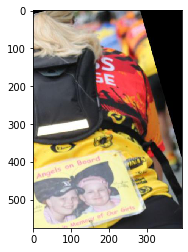

In [16]:
#lets have a look at a random picture from class 0
class_0_len=len(os.listdir(data_dir_train + class_0))
print('class_0_len   :', class_0_len)
class_0_index=random.randint(0, class_0_len-1)
print('class_0_index :', class_0_index)
class_0_random_file = data_dir_train + class_0 + '/' + os.listdir(data_dir_train + class_0)[class_0_index]
print(class_0_random_file)
#imread(class_0_random_file)
plt.imshow(imread(class_0_random_file))

class_1_len   : 2178
class_1_index : 36
images/train/yes-phat/011_1.JPG


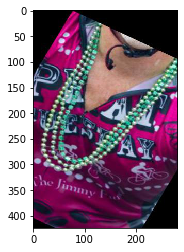

In [17]:
#lets have a look at a random picture from class 1
class_1_len=len(os.listdir(data_dir_train + class_1))
print('class_1_len   :', class_1_len)
class_1_index=random.randint(0, class_1_len-1)
print('class_1_index :', class_0_index)
class_1_random_file = data_dir_train + class_1 + '/' + os.listdir(data_dir_train + class_1)[class_1_index]
print(class_1_random_file)
#imread(class_0_random_file)
plt.imshow(imread(class_1_random_file));

In [18]:
# 
print('data_dir_train :', data_dir_train)
print('data_dir_test  :', data_dir_test)

data_dir_train : images/train/
data_dir_test  : images/test/


In [19]:
# lets loop through all the images and examie dimensions
dim1 = []
dim2 = []
color = []

check_dimensions = False  # you wont neeed to run this more than once
if check_dimensions:
    for image_filename in os.listdir(data_dir_train  + class_0 + '/'):
        img=imread(data_dir_train + class_0 + '/' + image_filename)
        d1, d2, c = img.shape
        dim1.append(d1)
        dim2.append(d2)
        color.append(c)
if check_dimensions:    
    for image_filename in os.listdir(data_dir_train  + class_1 + '/'):
        img=imread(data_dir_train + class_1 + '/' + image_filename)
        d1, d2, c = img.shape
        dim1.append(d1)
        dim2.append(d2)
        color.append(c)
if check_dimensions:    
    for image_filename in os.listdir(data_dir_test  + class_0 + '/'):
        img=imread(data_dir_test + class_0 + '/' + image_filename)
        d1, d2, c = img.shape
        dim1.append(d1)
        dim2.append(d2)
        color.append(c)
if check_dimensions:    
    for image_filename in os.listdir(data_dir_test  + class_1 + '/'):
        img=imread(data_dir_test + class_1 + '/' + image_filename)
        d1, d2, c = img.shape
        dim1.append(d1)
        dim2.append(d2)
        color.append(c)
 

In [20]:
if check_dimensions:
    print('min color :', np.min(color))
    print('max color :', np.max(color))
    print('min dim1  :', np.min(dim1))
    print('max dim1  :', np.max(dim1))
    print('min dim2  :', np.min(dim2))
    print('max dim2  :', np.max(dim2))
    print('mean dim1 :', np.mean(dim1))
    print('mean dim2 :', np.mean(dim2))

In [21]:
if check_dimensions:
    plt.boxplot(dim1);

In [22]:
if check_dimensions:
    plt.boxplot(dim2);

In [23]:
if check_dimensions:
    sns.jointplot(dim1,dim2);

In [24]:
# tf will need a consistent dimension, 
# so lets use numbers close to the mean and color channels 3
image_shape = (376,210,3)

In [25]:
# how many train/test files do we have?
print('X_train files (not phat) :', len(os.listdir(data_dir_train + class_0)))
print('y_train files (yes phat) :', len(os.listdir(data_dir_train + class_1)))
print('X_test files  (not phat) :', len(os.listdir(data_dir_test + class_0)))
print('y_test files  (yes phat) :', len(os.listdir(data_dir_test + class_1)))


X_train files (not phat) : 2035
y_train files (yes phat) : 2178
X_test files  (not phat) : 25
y_test files  (yes phat) : 25


In [26]:
# are our images scaled
print('class_0 min intensity : ' , imread(class_0_random_file).min())
print('class_0 max intensity : ' , imread(class_0_random_file).max())
print('class_1 min intensity : ' , imread(class_1_random_file).min())
print('class_1 max intensity : ' , imread(class_1_random_file).max())
# nope

class_0 min intensity :  0
class_0 max intensity :  255
class_1 min intensity :  0
class_1 max intensity :  255


In [27]:
# images are not scaled, we will need to do that
try:
    del image_gen
except:
    print('img gen not defined yet, saul goodman!')
    
# if scaling was needed
#   rescale=1/255 would be the proper parameter
# also throw in some randomness on rotation, shift, zoom, etc
image_gen= ImageDataGenerator(rescale=1/255,
                              rotation_range=20,
                              width_shift_range=0.10,
                              height_shift_range=0.10,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')  #fill modes constant, nearest*, reflect, wrap

# images are not scaled, we will need to do that
try:
    del image_gen
except:
    print('img gen not defined yet, saul goodman!')

image_gen= ImageDataGenerator(rescale=1/255) 


img gen not defined yet, saul goodman!


performing a random trnsform on an image using tensorflow/keras
before


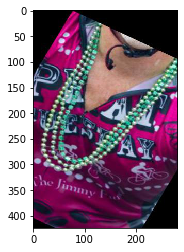

after


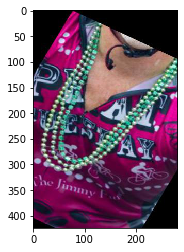

In [28]:
print('performing a random trnsform on an image using tensorflow/keras')
print('before')
plt.imshow(imread(class_1_random_file))
plt.show()
print('after')
plt.imshow(image_gen.random_transform(imread(class_1_random_file)))

In [29]:
# we will be using flow_from_directory to train our model
image_gen.flow_from_directory(data_dir_train)

Found 4213 images belonging to 2 classes.


In [30]:
image_gen.flow_from_directory(data_dir_test)

Found 50 images belonging to 2 classes.


In [31]:
try:
    del model
except:
    print('no model defined yet, saul goodman')
    
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

no model defined yet, saul goodman


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 374, 208, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 187, 104, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 185, 102, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 92, 51, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 300288)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               38436992  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [33]:
# not using early stopping for this model
#try:
#    del e_stop
#except:
#    print('e_stop is not defined yet, saul goodman')
      
#e_stop = EarlyStopping(monitor='val_loss', patience=2)
#print('e_stop defined')

try:
    del best_mod
except:
    print('best_mod is not defined yet, saul goodman')
    
    
    
# i want to save my very best model
best_mod = ModelCheckpoint('model/find_phat.h5', 
                     monitor='val_loss', 
                     save_best_only=True)
print('best_mod defined')

best_mod is not defined yet, saul goodman
best_mod defined


In [34]:
batch_size=16

In [35]:
try:
    del train_image_gen
except:
    pass

train_image_gen = image_gen.flow_from_directory(data_dir_train,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 4213 images belonging to 2 classes.


In [36]:
try:
    del test_image_gen
except:
    pass

test_image_gen = image_gen.flow_from_directory(data_dir_test, 
                                                target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle=False)

Found 50 images belonging to 2 classes.


In [37]:
# sanity check here, make sure my classes in train/test folder are the same
train_image_gen.class_indices

{'no-phat': 0, 'yes-phat': 1}

In [38]:
test_image_gen.class_indices

{'no-phat': 0, 'yes-phat': 1}

In [39]:
my_epochs = 25
# my main machine has 2 GPU(s)
# so here i select which device i want to train the model on
if False:
    with tf.device('/CPU:0'):
        # CPU
        results = model.fit_generator(train_image_gen, epochs=my_epochs, validation_data=test_image_gen, callbacks=[best_mod]) 
if True:
    with tf.device('/GPU:0'): 
        # RTX 2080
        results = model.fit_generator(train_image_gen, epochs=my_epochs, validation_data=test_image_gen, callbacks=[best_mod])
if False:
    with tf.device('/GPU:1'): 
        # GTX 970
        results = model.fit_generator(train_image_gen, epochs=my_epochs, validation_data=test_image_gen, callbacks=[best_mod])
    



Epoch 1/25
264/264 [==============================] - 29s 109ms/step - loss: 0.4699 - accuracy: 0.8141 - val_loss: 0.5906 - val_accuracy: 0.7800
Epoch 2/25
264/264 [==============================] - 25s 94ms/step - loss: 0.2413 - accuracy: 0.9013 - val_loss: 1.0113 - val_accuracy: 0.7000
Epoch 3/25
264/264 [==============================] - 26s 98ms/step - loss: 0.1643 - accuracy: 0.9390 - val_loss: 0.8251 - val_accuracy: 0.7800
Epoch 4/25
264/264 [==============================] - 25s 94ms/step - loss: 0.0779 - accuracy: 0.9696 - val_loss: 1.0298 - val_accuracy: 0.8200
Epoch 5/25
264/264 [==============================] - 25s 95ms/step - loss: 0.0802 - accuracy: 0.9739 - val_loss: 2.3853 - val_accuracy: 0.7600
Epoch 6/25
264/264 [==============================] - 26s 99ms/step - loss: 0.0345 - accuracy: 0.9896 - val_loss: 0.5648 - val_accuracy: 0.8400
Epoch 7/25
264/264 [==============================] - 25s 95ms/step - loss: 0.0154 - accuracy: 0.9955 - val_loss: 2.1050 - val_accuracy

In [40]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.456796,0.814147,0.590617,0.78
1,0.241875,0.901258,1.011338,0.70
2,0.164385,0.938998,0.825113,0.78
3,0.078120,0.969618,1.029797,0.82
4,0.080066,0.973890,2.385292,0.76
5,0.034517,0.989556,0.564809,0.84
6,0.015453,0.995490,2.105038,0.80
7,0.028674,0.990268,2.899689,0.76
8,0.056507,0.983622,0.843682,0.84
9,0.015097,0.995015,2.559517,0.80


In [41]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

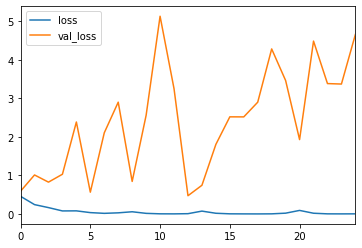

In [42]:
metrics[['loss','val_loss']].plot();

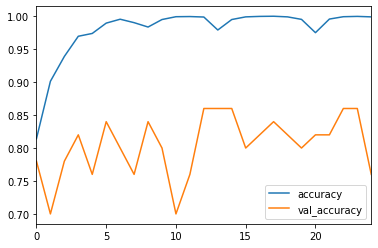

In [43]:
metrics[['accuracy','val_accuracy']].plot();

In [44]:
best_model = load_model('model/find_phat.h5')

In [45]:
best_model.evaluate_generator(test_image_gen)

[0.4727694117464125, 0.86]

In [46]:
pred=best_model.predict_generator(test_image_gen)

In [47]:
np.round(pred.ravel(),2)

array([0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.01, 0.5 , 0.  , 0.  , 0.  ,
       0.06, 0.  , 0.69, 0.  , 0.01, 0.  , 0.08, 0.99, 0.  , 0.  , 0.15,
       0.92, 0.  , 0.  , 1.  , 0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 0.79,
       1.  , 0.23, 1.  , 0.88, 1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.99,
       1.  , 1.  , 1.  , 1.  , 0.97, 1.  ], dtype=float32)

In [48]:
# first 25 predictions, all truly not phat
np.round(pred[:25],3) 
# the model had a little trouble at index 3 (0.999), 7 (0.502), 13 (0.689), 18 (0.993) and 22 (0.925)

array([[0.   ],
       [0.   ],
       [0.   ],
       [0.999],
       [0.002],
       [0.   ],
       [0.013],
       [0.502],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.063],
       [0.   ],
       [0.689],
       [0.   ],
       [0.008],
       [0.   ],
       [0.082],
       [0.993],
       [0.   ],
       [0.   ],
       [0.148],
       [0.925],
       [0.   ],
       [0.   ]], dtype=float32)

In [49]:
### last 25 predictions, truly phat
np.round(pred[25:],3)
# model had a little trouble at index 9 (0.235) and 13 (0.)

array([[1.   ],
       [0.995],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.793],
       [1.   ],
       [0.235],
       [1.   ],
       [0.878],
       [0.999],
       [0.   ],
       [1.   ],
       [1.   ],
       [0.999],
       [1.   ],
       [0.994],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.972],
       [0.998]], dtype=float32)

In [50]:
df_combined_preds = pd.DataFrame(test_image_gen.classes)
df_combined_preds = pd.concat([df_combined_preds,pd.Series(np.round(pred.ravel(),3))], axis=1)
#df_combined_preds

In [51]:
###
### SET THRESHOLD at > 0.50
###
predictions_1 = (pred > 0.5)
preds_df_1 = pd.DataFrame(predictions_1)
df_combined_preds = pd.concat([df_combined_preds,preds_df_1], axis=1)
preds_df_1 = pd.concat([preds_df_1, pd.Series(test_image_gen.classes)], axis=1)
preds_df_1.columns=['prediction', 'truth']
preds_df_1.prediction = preds_df_1.prediction.astype(int)
print(classification_report(test_image_gen.classes, predictions_1))
# Truth = test_image_gen.classes
confusion_matrix_1 = confusion_matrix(test_image_gen.classes, predictions_1)
print(confusion_matrix_1)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.82      0.92      0.87        25

    accuracy                           0.86        50
   macro avg       0.87      0.86      0.86        50
weighted avg       0.87      0.86      0.86        50

[[20  5]
 [ 2 23]]


In [66]:
###
### SET THRESHOLD at > 0.95
###
predictions_2 = (pred > 0.95)
preds_df_2 = pd.DataFrame(predictions_2)
df_combined_preds = pd.concat([df_combined_preds,preds_df_2], axis=1)
preds_df_2 = pd.concat([preds_df_2, pd.Series(test_image_gen.classes)], axis=1)
preds_df_2.columns=['prediction', 'truth']
preds_df_2.prediction = preds_df_2.prediction.astype(int)

# Truth = test_image_gen.classes

print('classification report\n')
print(classification_report(test_image_gen.classes, predictions_2))
confusion_matrix_2 = confusion_matrix(test_image_gen.classes, predictions_2)
print('\nconfusion matrix')
print(confusion_matrix_2)

classification report

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.91      0.84      0.87        25

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50


confusion matrix
[[23  2]
 [ 4 21]]


In [53]:
###
### SET THRESHOLD at > 0.05
###
predictions_3 = (pred > 0.05)
preds_df_3 = pd.DataFrame(predictions_3)
df_combined_preds = pd.concat([df_combined_preds,preds_df_3], axis=1)
preds_df_3 = pd.concat([preds_df_3, pd.Series(test_image_gen.classes)], axis=1)
preds_df_3.columns=['prediction', 'truth']
preds_df_3.prediction = preds_df_3.prediction.astype(int)
print(classification_report(test_image_gen.classes, predictions_3))
# Truth = test_image_gen.classes
confusion_matrix_3 = confusion_matrix(test_image_gen.classes, predictions_3)
print(confusion_matrix_3)

              precision    recall  f1-score   support

           0       0.94      0.68      0.79        25
           1       0.75      0.96      0.84        25

    accuracy                           0.82        50
   macro avg       0.85      0.82      0.82        50
weighted avg       0.85      0.82      0.82        50

[[17  8]
 [ 1 24]]


In [54]:
print('what went wrong')
df_combined_preds.columns=['truth','predicted', 'fifty', 'ninety_five', 'five']
print('\ntrouble with 0.50')
print(df_combined_preds[ (df_combined_preds.truth != df_combined_preds.fifty)])
print('\ntrouble with 0.95')
print(df_combined_preds[ (df_combined_preds.truth != df_combined_preds.ninety_five)  ])
print('\ntrouble with 0.05')
print(df_combined_preds[ (df_combined_preds.truth != df_combined_preds.five)  ])


what went wrong

trouble with 0.50
    truth  predicted  fifty  ninety_five   five
3       0      0.999   True         True   True
7       0      0.502   True        False   True
13      0      0.689   True        False   True
18      0      0.993   True         True   True
22      0      0.925   True        False   True
34      1      0.235  False        False   True
38      1      0.000  False        False  False

trouble with 0.95
    truth  predicted  fifty  ninety_five   five
3       0      0.999   True         True   True
18      0      0.993   True         True   True
32      1      0.793   True        False   True
34      1      0.235  False        False   True
36      1      0.878   True        False   True
38      1      0.000  False        False  False

trouble with 0.05
    truth  predicted  fifty  ninety_five   five
3       0      0.999   True         True   True
7       0      0.502   True        False   True
11      0      0.063  False        False   True
13      0      

In [55]:
print('what went right')
df_combined_preds.columns=['truth','predicted', 'fifty', 'ninety_five', 'five']
print('\ngoot at 0.50')
print(df_combined_preds[ (df_combined_preds.truth == df_combined_preds.fifty)])
print('\ngood at 0.95')
print(df_combined_preds[ (df_combined_preds.truth == df_combined_preds.ninety_five)  ])
print('\ngood at 0.05')
print(df_combined_preds[ (df_combined_preds.truth == df_combined_preds.five)  ])


what went right

goot at 0.50
    truth  predicted  fifty  ninety_five   five
0       0      0.000  False        False  False
1       0      0.000  False        False  False
2       0      0.000  False        False  False
4       0      0.002  False        False  False
5       0      0.000  False        False  False
6       0      0.013  False        False  False
8       0      0.000  False        False  False
9       0      0.000  False        False  False
10      0      0.000  False        False  False
11      0      0.063  False        False   True
12      0      0.000  False        False  False
14      0      0.000  False        False  False
15      0      0.008  False        False  False
16      0      0.000  False        False  False
17      0      0.082  False        False   True
19      0      0.000  False        False  False
20      0      0.000  False        False  False
21      0      0.148  False        False   True
23      0      0.000  False        False  False
24      0 

In [56]:
print("confusion matrix .50")
print(confusion_matrix_1)
print("confusion matrix .95")
print(confusion_matrix_2)
print("confusion matrix .05")
print(confusion_matrix_3)


confusion matrix .50
[[20  5]
 [ 2 23]]
confusion matrix .95
[[23  2]
 [ 4 21]]
confusion matrix .05
[[17  8]
 [ 1 24]]


In [57]:
# for my purposes, I want my model to have high precision.
# When the model tells me it found a team phat tuesday picture, i want it to 
# be of phat tuesday as much sa possible.
# so thats a high precision to weed out the duds, weed out the FP
# from the confusion matrices above >.95 has the lowest FP
# have a closer look at threshold > 0.95
print(test_image_gen.classes[0:25])
print(predictions_2[:25])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]


In [58]:
print(test_image_gen.classes[25:])
print(predictions_2[25:])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [59]:
print("confusion matrix .95\n")
print ("[[TN FP]")
print (" [FN TP]]\n")
print(confusion_matrix_2)

confusion matrix .95

[[TN FP]
 [FN TP]]

[[23  2]
 [ 4 21]]


In [ ]:
# I got 21 in the true positve, truly of class 1, predicted class 1 
# only 2 in the false positive range. truly class 0,  predicted class 1, 

In [ ]:
# a look at all the images classified as phat

correctly classified as phat
25 1 1


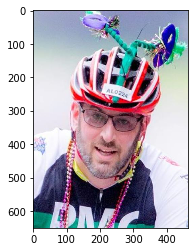

26 1 1


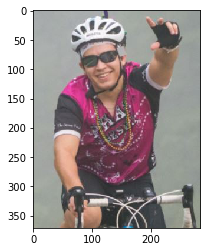

27 1 1


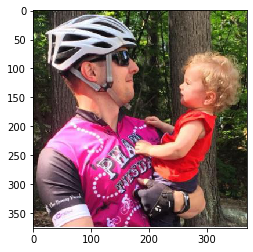

28 1 1


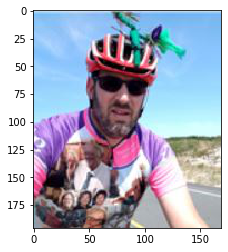

29 1 1


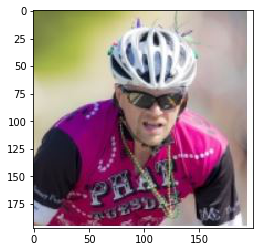

30 1 1


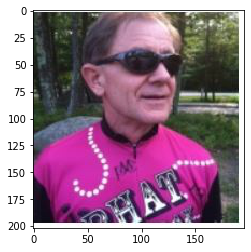

31 1 1


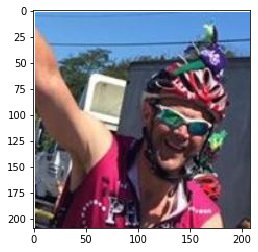

33 1 1


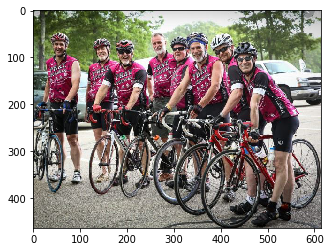

35 1 1


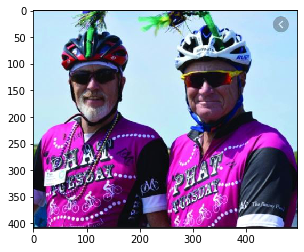

37 1 1


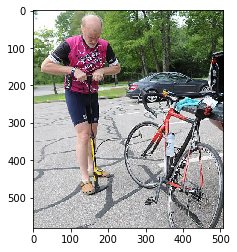

39 1 1


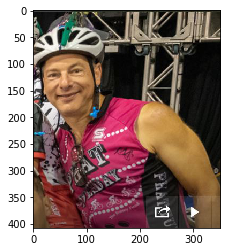

40 1 1


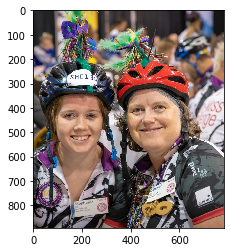

41 1 1


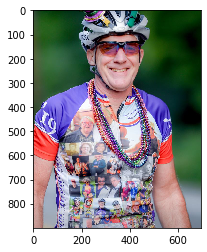

42 1 1


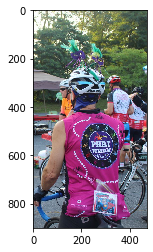

43 1 1


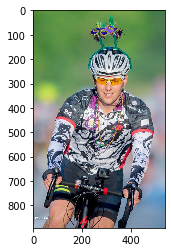

44 1 1


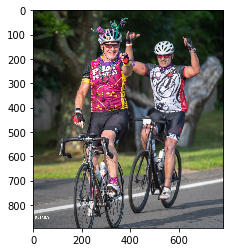

45 1 1


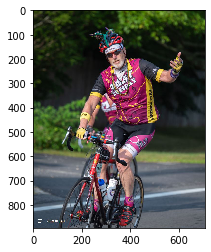

46 1 1


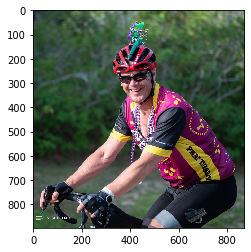

47 1 1


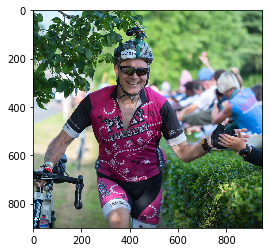

48 1 1


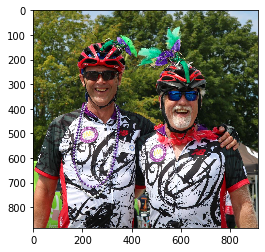

49 1 1


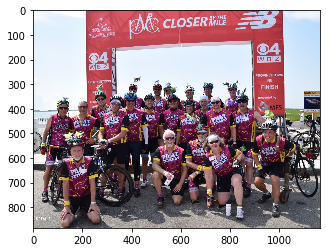

In [60]:
# have a look at the true positives
true_positive = preds_df_2[(preds_df_2['prediction'] == preds_df_2['truth']) & (preds_df_2['prediction']==1) ]

print('correctly classified as phat')
for index, row in true_positive.iterrows():
    print(index, row['prediction'], row['truth'])
    one_unidentified_file = data_dir_test + class_1 + '/' + os.listdir(data_dir_test + class_1 + '/')[index-25]
    plt.imshow(imread(one_unidentified_file))
    plt.show()

incorrectly classified as phat
3 1 0


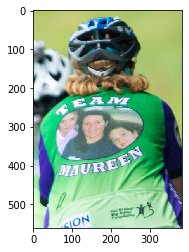

18 1 0


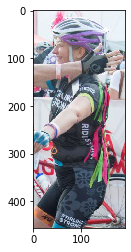

In [61]:
# have a look at the mis classified images - false positives
false_positive = preds_df_2[(preds_df_2['prediction'] != preds_df_2['truth']) & (preds_df_2['prediction']==1) ]

print('incorrectly classified as phat')
for index, row in false_positive.iterrows():
    print(index, row['prediction'], row['truth'])
    one_unidentified_file = data_dir_test + class_0 + '/' + os.listdir(data_dir_test + class_0 + '/')[index]
    plt.imshow(imread(one_unidentified_file))
    plt.show()

In [ ]:
# conclusion
# this model could be useful in pouring through thousands of images, looking for team phat tuesday

# if you found this repo helpful please consider donating to the PMC
https://donate.pmc.org/BM0248/